# Project 2: Ames Housing Data and Kaggle Challenge

**Project Statement:** This project aims to examine see what factors contribute in predicting property prices in the housing market using the Ames Housing Data.

**Summary:** The Ames Housing Dataset is an exceptionally detailed and robust dataset with a total number of 80 different features relating to houses and over 2000 observations. There are many factors involved in real estate pricing. In reality, it is often hard for us to tell which factors are more important and which factors are not. For this project, we will attempt to build a prediction model to predict house prices of Ames, Iowa with supervised predictive modeling techniques. The dataset is from a [Kaggle competition](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/overview).

We will construct multiple regression model that will take in several independent variables, predict the sale price of a house. We will then train the models based on the training dataset and validate the model through the validation dataset. Finally, our goal is to best predict the sale prices of the houses in the test set, and our predictions will then be evaluated on Kaggle. From there, we will find out which factors contribute the most in predicting property prices.

## Contents:
- [Cleaning Train Dataset](#Cleaning-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing](#Preprocessing)
- [Cleaning and Preprocessing Test and Validation Dataset](#Validation-and-Test-Data-Cleaning-and-Preprocessing)
- [Final Check](#Shape-Check)
- [Data Export](#Data-Exporting)


## Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Cleaning Dataset

In [97]:
#data importing for train dataset
train_df = pd.read_csv('../datasets/train.csv')

In [98]:
#checking
print(train_df.shape)
train_df.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [99]:
#configure jupyter lab to prevent truncation for easier reference for columns
pd.set_option('display.max_columns', None)

In [100]:
#cleaning column names 
train_df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('/', '_'), inplace= True)

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [102]:
#splitting training dataset into train and validation dataset
train, valid = train_test_split(train_df, test_size=0.2, random_state=123)

In [103]:
# Resetting index for shuffled training & validation sets
# Reassigning instead of inplace parameter used to avoid SettingWithCopy warning
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

After importing the train dataset which our model will be based on, we split the dataset into two namely one for training of the model and second for validating the model. We named it 'train' and 'valid' datasets to avoid confusion with the test dataset which our prediction will be based on.

### Handling NaN values

In [104]:
#making function to replace null values 
def change_values(df,feat_list, obj_replace_with, else_replace_with):
    for col in df[feat_list]:
        if df[col].dtype == object:
            df[col].fillna(obj_replace_with, inplace=True)
        else:
            df[col].fillna(value=else_replace_with, inplace=True)

In [105]:
# Check for nulls
train.select_dtypes(include=['int64']).isnull().sum()

id                 0
pid                0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod_add     0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

In [106]:
# Check for nulls in columns with float values
train.select_dtypes(include=['float']).isnull().sum().sort_values(ascending=False)

lot_frontage      264
garage_yr_blt      82
mas_vnr_area       17
bsmt_full_bath      1
bsmt_half_bath      1
garage_cars         1
garage_area         1
bsmtfin_sf_1        0
bsmtfin_sf_2        0
bsmt_unf_sf         0
total_bsmt_sf       0
dtype: int64

In [107]:
# Check for nulls in columns with float values
train.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

pool_qc           1632
misc_feature      1586
alley             1525
fence             1312
fireplace_qu       799
garage_finish       82
garage_cond         82
garage_qual         82
garage_type         81
bsmt_exposure       45
bsmtfin_type_2      44
bsmt_cond           43
bsmtfin_type_1      43
bsmt_qual           43
mas_vnr_type        17
paved_drive          0
functional           0
kitchen_qual         0
electrical           0
central_air          0
heating_qc           0
heating              0
ms_zoning            0
street               0
condition_2          0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
bldg_type            0
foundation           0
house_style          0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
exter_qual           0
exter_cond           0
sale_type            0
dtype: int64

#### Features with Years

In [108]:
#handling garage
##checking 'garage_age'
train.loc[
    np.abs(train['garage_yr_blt'] - train['year_built']) <= 1,
    ['garage_yr_blt', 'year_built']
]

,garage_yr_blt,year_built
1,2005.0,2005
2,1977.0,1977
3,1977.0,1977
4,1958.0,1958
5,1969.0,1969
...,...,...
1634,2000.0,2000
1635,1940.0,1940
1636,1999.0,1999
1637,2004.0,2004


In [109]:
# Replacing null values with values from year_built column
train.loc[train['garage_yr_blt'].isnull(), ['garage_yr_blt']] = train.loc[train['garage_yr_blt'].isnull(), 'year_built']

In [110]:
##handling years

#combining features to create new features
train['property_age'] = train['yr_sold'] - train['year_built']
train['garage_age'] = train['yr_sold'] - train['garage_yr_blt']
train['age_remod_add'] = train['year_remod_add'] - train['year_built']

In [111]:
#dropping unnecessary columns after making new features
train.drop(columns=['yr_sold','year_built','garage_yr_blt','year_remod_add'], inplace=True)

In [112]:
#checking outliers
train[['garage_age']].sort_values(by=['garage_age'],ascending=True)

,garage_age
145,-200.0
1484,-1.0
1019,0.0
1406,0.0
1242,0.0
...,...
1492,108.0
221,112.0
1595,118.0
114,135.0


In [113]:
train = train.loc[train['garage_age'] >= 0]

In [114]:
train.reset_index(drop=True, inplace=True)

Having to know when or the year that the property was built does not value add to the model. However, age of the respective features may contribute better. New columns were built to reflect this and the years features were dropped subsequently.

Garage features were cleaned up with `'garage_yr_blt'` missing values being replaced with the same values as what was found in their `'year_built'`. Also, '`garage_cars'`,`'garage_area'` were also inputted with 0 value since they reflect an absence of garage and falls in the same row.

We also removed those age with that has a negative value an treat them as outliers.

#### Basement Features

In [115]:
##making function that will output a list of same named features
col_list = train.columns.values.tolist()

def making_list (column, substr):
    make_list=[]
    for col in column:
        if substr in col:
            make_list.append(col)
    return make_list

In [116]:
##basement check
bsmt_list= making_list(col_list,'bsmt')
train[bsmt_list].isnull().sum().sort_values(ascending=False)

bsmt_exposure     45
bsmtfin_type_2    44
bsmt_qual         43
bsmt_cond         43
bsmtfin_type_1    43
bsmt_full_bath     1
bsmt_half_bath     1
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
dtype: int64

In [117]:
train[bsmt_list].head()

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
0,TA,TA,No,Rec,336.0,Unf,0.0,336.0,672.0,1.0,0.0
1,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,0.0,0.0
2,TA,TA,No,Unf,0.0,Unf,0.0,660.0,660.0,0.0,0.0
3,Gd,TA,No,BLQ,392.0,Unf,0.0,768.0,1160.0,0.0,0.0
4,TA,TA,Gd,ALQ,513.0,Unf,0.0,75.0,588.0,1.0,0.0


In [118]:
train.groupby('bsmtfin_type_2')['bsmt_exposure'].value_counts()

bsmtfin_type_2  bsmt_exposure
ALQ             No                15
                Av                 6
                Gd                 6
                Mn                 1
BLQ             No                29
                Av                 5
                Mn                 3
                Gd                 2
GLQ             No                 7
                Av                 6
                Gd                 5
                Mn                 2
LwQ             No                34
                Mn                 5
                Gd                 4
                Av                 3
Rec             No                41
                Mn                10
                Gd                 7
                Av                 6
Unf             No               936
                Av               201
                Gd               144
                Mn               114
Name: bsmt_exposure, dtype: int64

In [119]:
train.groupby('bsmt_exposure')['bsmtfin_type_2'].value_counts()

bsmt_exposure  bsmtfin_type_2
Av             Unf               201
               ALQ                 6
               GLQ                 6
               Rec                 6
               BLQ                 5
               LwQ                 3
Gd             Unf               144
               Rec                 7
               ALQ                 6
               GLQ                 5
               LwQ                 4
               BLQ                 2
Mn             Unf               114
               Rec                10
               LwQ                 5
               BLQ                 3
               GLQ                 2
               ALQ                 1
No             Unf               936
               Rec                41
               LwQ                34
               BLQ                29
               ALQ                15
               GLQ                 7
Name: bsmtfin_type_2, dtype: int64

In [120]:
#changing 'bsmtfin_type_2' and 'bsmt_exposure' to mode
change_values(train,['bsmtfin_type_2'], 'Unf', 0.0)

change_values(train,['bsmt_exposure'], 'No', 0)

#changing balance basement features to appropriate values
change_values(train, bsmt_list, 'NA', 0)

For the basement features, there appears to be two cases: missing entries where there is no basement, and missing values where there is a basement. Firstly, we identified the columns with some missing values even though there was a presence of a basement. For this case, we input the most occurring value in relation to each other. After that, we replaced the missing values with `'NA'` for datatype object after seeing the data dictionary that these features show that missing value represent the absence of the feature and 0 for numerical data.

#### Features with 'NA' as a Value

In [121]:
#to confirm that NA values are actually the missing values
train['alley'].value_counts()

Grvl    67
Pave    48
Name: alley, dtype: int64

In [122]:
#to confirm that NA values are actually the missing values
train_df['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [123]:
#checking if all null values means absence of feature that has no null values
def check_missing(area, feat):
    return print(train.loc[train[area] > 0, [feat]].isnull().any())

In [124]:
#check against features with 'object' datatype
check_missing('garage_area', 'garage_qual')
check_missing('garage_area', 'garage_type')
check_missing('fireplaces', 'fireplace_qu')
check_missing('mas_vnr_area', 'mas_vnr_type')

garage_qual    False
dtype: bool
garage_type    False
dtype: bool
fireplace_qu    False
dtype: bool
mas_vnr_type    False
dtype: bool


In [125]:
#replace NaN values in columns with object datatypes as 'NA' and those in float to value of 0
float_list = train.select_dtypes(include=['float64']).isnull().columns.tolist()
obj_list = train.select_dtypes(include=['object']).isnull().columns.tolist()

train[obj_list]=train[obj_list].fillna('NA')
train[float_list]=train[float_list].fillna(value=0)

These are features that have 'NA' as one of the values for the features that will indicate an absence of the feature. For example, `'garage_qual'` would be related to `'garage_area'` as it explains garage features. If `'garage_are'` is 0 and a missing value is present in `'garage_qual'`, then the logic checks out that the missing value represents and absence of a garage.
Therefore, we can conclude that the missing values are indeed the case of an absence of the feature in the property. These missing values were then imputed accordingly.

In [126]:
#checking for any missed out missing values
train.isnull().sum().any()

False

In [127]:
#checking
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,sale_type,saleprice,property_age,garage_age,age_remod_add
0,2027,903426010,70,RM,0.0,5700,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Feedr,Norm,1Fam,2Story,7,6,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,336.0,Unf,0.0,336.0,672.0,GasA,Gd,N,FuseA,672,672,0,1344,1.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Attchd,Unf,2.0,456.0,TA,TA,Y,0,0,70,0,0,0,NA,GdPrv,NA,0,9,WD,140000,78,28.0,61
1,2406,528181030,120,RL,48.0,6955,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,GasA,Ex,Y,SBrkr,1368,0,0,1368,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,RFn,2.0,474.0,TA,TA,Y,132,35,0,0,0,0,NA,NA,NA,0,9,New,202500,1,1.0,1
2,2063,905107140,20,RL,71.0,8197,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,5,Gable,CompShg,Plywood,Plywood,BrkFace,148.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,660.0,660.0,GasA,Ex,Y,SBrkr,1285,0,0,1285,0.0,0.0,1,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2.0,528.0,TA,TA,Y,138,0,0,0,0,0,NA,MnPrv,NA,0,4,WD,143500,30,30.0,0
3,1400,905352030,60,RL,83.0,10005,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392.0,Unf,0.0,768.0,1160.0,GasA,Ex,Y,SBrkr,1156,866,0,2022,0.0,0.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,Fin,2.0,505.0,TA,TA,Y,288,117,0,0,0,0,NA,NA,NA,0,3,WD,192000,31,31.0,0
4,2549,534427090,190,RL,75.0,10382,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,6,5,Hip,CompShg,HdBoard,HdBoard,BrkFace,105.0,TA,Fa,CBlock,TA,TA,Gd,ALQ,513.0,Unf,0.0,75.0,588.0,GasA,TA,Y,SBrkr,1095,0,0,1095,1.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Attchd,RFn,1.0,264.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,3,ConLD,140000,48,48.0,0


### Feature Classification

Features will be divided to four categories:

- Ordinal
- Nominal
- Continuous
- Discrete

In [128]:
#checking number of columns
train.shape

(1638, 80)

In [129]:
#making a dictionary of categorised features
feature_cat = {
    'ordinal_feat':['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                    'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional','fireplace_qu',
                    'garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence'],
    'continuous_feat':['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf',
                    'total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area','garage_area',
                      'wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val',
                     'property_age','garage_age','age_remod_add','saleprice'],
    'nominal_feat':['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1','condition_2',
                    'bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type',
                  'foundation','heating','central_air','garage_type','misc_feature','sale_type','mo_sold'],
    'discrete_feat':['id','pid','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd',
                   'fireplaces','garage_cars']
}

In [130]:
#checking for total features in the dictionary to check for any missed out features
sum((len(val) for val in feature_cat.values()))

80

Based on the data dictionary on Kaggle, the features are classified into the respective categories. The age of features that were created were placed in `'continuous_feat'`. In total, there are 80 unique features in the dataset.

------------------------------------------------
## Exploratory Data Analysis

In [131]:
# Creating a function to show a boxplot and barplot for each feature side by side
def subplot_box_hist(dataframe, list_of_features, figsize=()):
    nrows = len(list_of_features) # 1 row per feature, 2 plots per feature
    fsize = (14, len(list_of_features) * 5)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=fsize, sharex=False, sharey=False)
    ax = ax.ravel()
    
    
    for i, feature in enumerate(list_of_features):
        # boxplot on the left
        sns.boxplot(
            ax=ax[i*2],
            data=dataframe,
            x=feature,
            y='saleprice',
            orient='v',
            linewidth=1,
            palette='viridis'
        )
        
        # bar chart on the right (histplot used to reflect proportion)
        if dataframe[feature].dtype == object:
            sns.histplot(
                data=dataframe,
                x=feature,
                ax=ax[(i*2 + 1)],
                hue=feature,
                stat='probability',
                palette='viridis',
                legend=False,
                bins=6
            
            )
        else: # To avoid overlapping values in the same bin for numerical features
            sns.histplot(
                data=dataframe,
                x=feature,
                ax=ax[(i*2 + 1)],
                hue=feature,
                stat='probability',
                palette='viridis',
                legend=False,
                discrete=True,
                bins=50
                
            )

        ax[i*2].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
        ax[i*2].set_ylabel('Sale Price', fontsize=10)
        ax[i*2].tick_params(axis='x', labelrotation = 45)
        ax[i*2].set_title(f"Boxplot of {feature.replace('_', ' ').title()} against Sale Price", fontsize=14, fontweight='bold')
        
        ax[(i*2) + 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
        ax[i*2 + 1].set_ylabel('Sale Price', fontsize=10)
        ax[i*2 + 1].tick_params(axis='x', labelrotation = 45)
        ax[(i*2) + 1].set_title(f"Histogram of {feature.replace('_', ' ').title()}", fontsize=14, fontweight='bold')
    fig.tight_layout()

### Ordinal Check

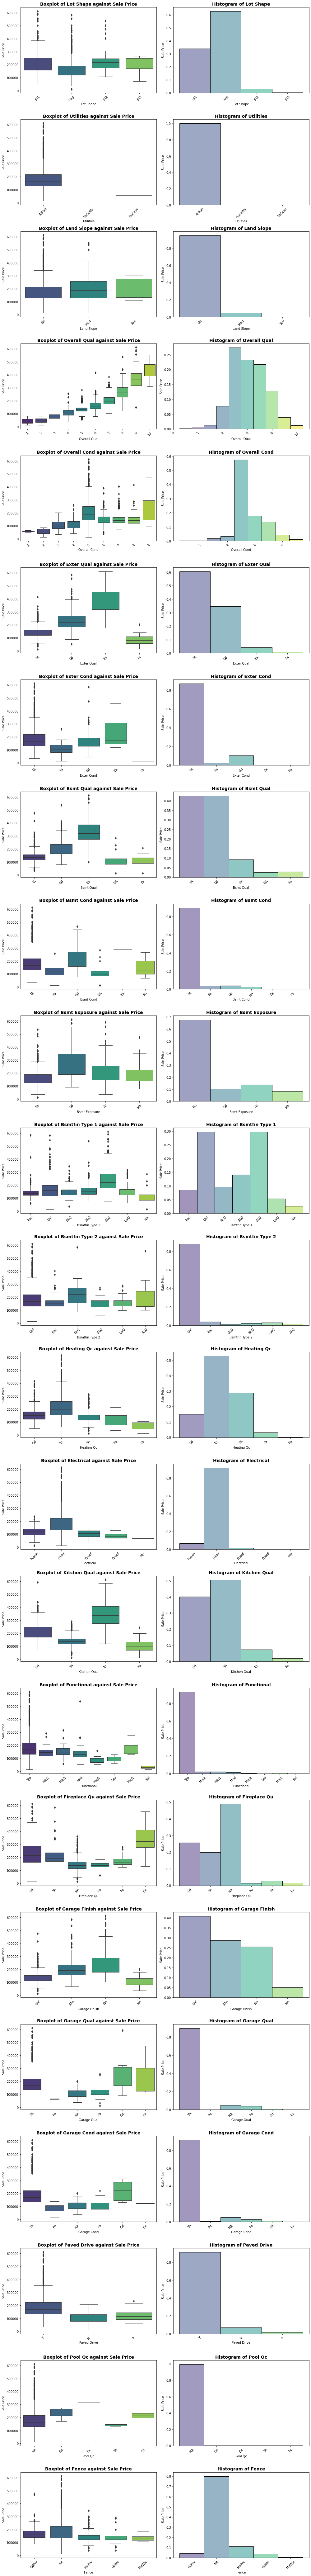

In [132]:
#check ordinal features
subplot_box_hist(train, feature_cat.get('ordinal_feat'))

In [133]:
# garage columns seem peculiar, checking further
(train['garage_qual'] == train['garage_cond']).mean()

0.9511599511599511

For ordinal features, those with extreme skews were dropped, such as `'pool_qc'`. In addition, the histograms reveal that some features that have the same description such as garage and basement, based on quality and condition, seem to have a similar response/shape. They will be potentially be either be dropped or combined to prevent a multi-collinearity in our model.
As for `'garage_qual'` and `'garage_cond'`, it has 90% of the values to be the same and one will be dropped.

Ordinal features dropped:

1) `'fence'`
2) `'pool_qc'`
3) `'paved_drive'`
4) `'functional'`
5) `'land_slope'`
6) `'utilities'`
7) `'garage_qual'`

In [134]:
##making function to drop columns and update feature dictionary
def drop_feature(df,feature_name,list_of_dropped_features):
    df.drop(columns=list_of_dropped_features, inplace=True)
    
    for feat in list_of_dropped_features:
        feature_cat[feature_name].remove(feat)

In [135]:
#dropping ordinal features
dropped_ordinal_feat = ['fence','pool_qc','paved_drive','functional','land_slope','utilities', 'garage_qual']

drop_feature(train,'ordinal_feat',dropped_ordinal_feat)

### Nominal Check

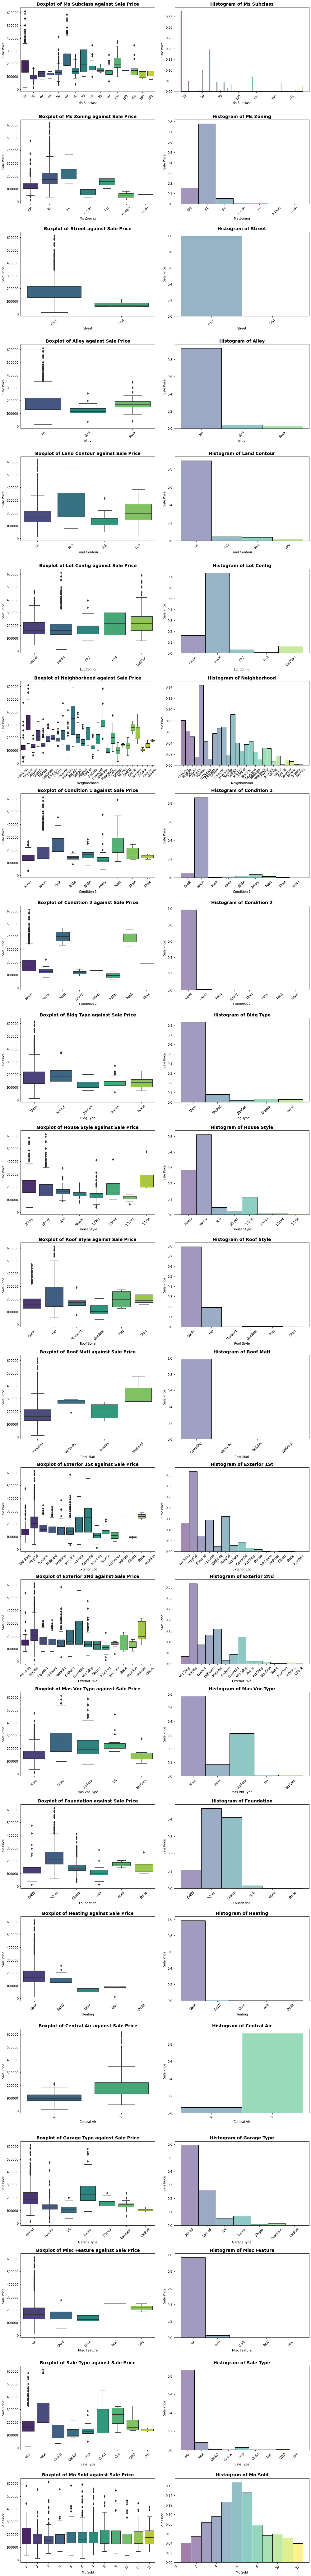

In [136]:
#check nominal features
subplot_box_hist(train, feature_cat.get('nominal_feat'))

For the nominal features, those with extreme skew in values in their histograms, such as `'alley'` will be dropped as it will not help with the modelling. 
For those with high skew, those with no trend with the `'saleprice'` in the corresponding boxplot was dropped as well. Therefore, some like `'sale_type'` were retained as the boxplot looks to have some form of trend that may contribute to the model.
Next, the boxplots were examined and those with IQRs that have high overlapping were also dropped, for example `'misc_feature'`.  

Nominal features dropped:

1) `'misc_feature'`
2)  `'heating'`
3) `'roof_matl'`
4) `'condition_1'`
5) `'condition_2'`
6) `'alley'`
7) `'street'`

In [137]:
#dropping nominal features
dropped_nominal_feat = ['misc_feature','heating','roof_matl','condition_1','condition_2','alley','street']

drop_feature(train,'nominal_feat',dropped_nominal_feat)

In [138]:
#changing int in ms_subclass to str as they represent a class of building
train['ms_subclass'] = train['ms_subclass'].apply(str)

### Continuous Check

In [139]:
#check continous data

# Creating a function to show scatter plots of feature against sale price
def subplot_scatter(dataframe, list_of_features, figsize=()):
    nrows = int(np.ceil(len(list_of_features)/2))
    fsize = (14, nrows * 5)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=fsize, sharex=False, sharey=True)
    ax = ax.ravel()
    
    for i, feature in enumerate(list_of_features):      
        sns.regplot(
            data=dataframe,
            x=feature, 
            y='saleprice', 
            ax=ax[i],
            scatter_kws={'s': 4, 'alpha': 0.5},
            line_kws={'color':'lightcoral'}
        )

        ax[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
        ax[i].set_ylabel('Sale Price', fontsize=14)
        ax[i].set_title(f'Scatterplot of {feature.replace("_" , " ").title()}', fontweight='bold')
         
    fig.tight_layout()

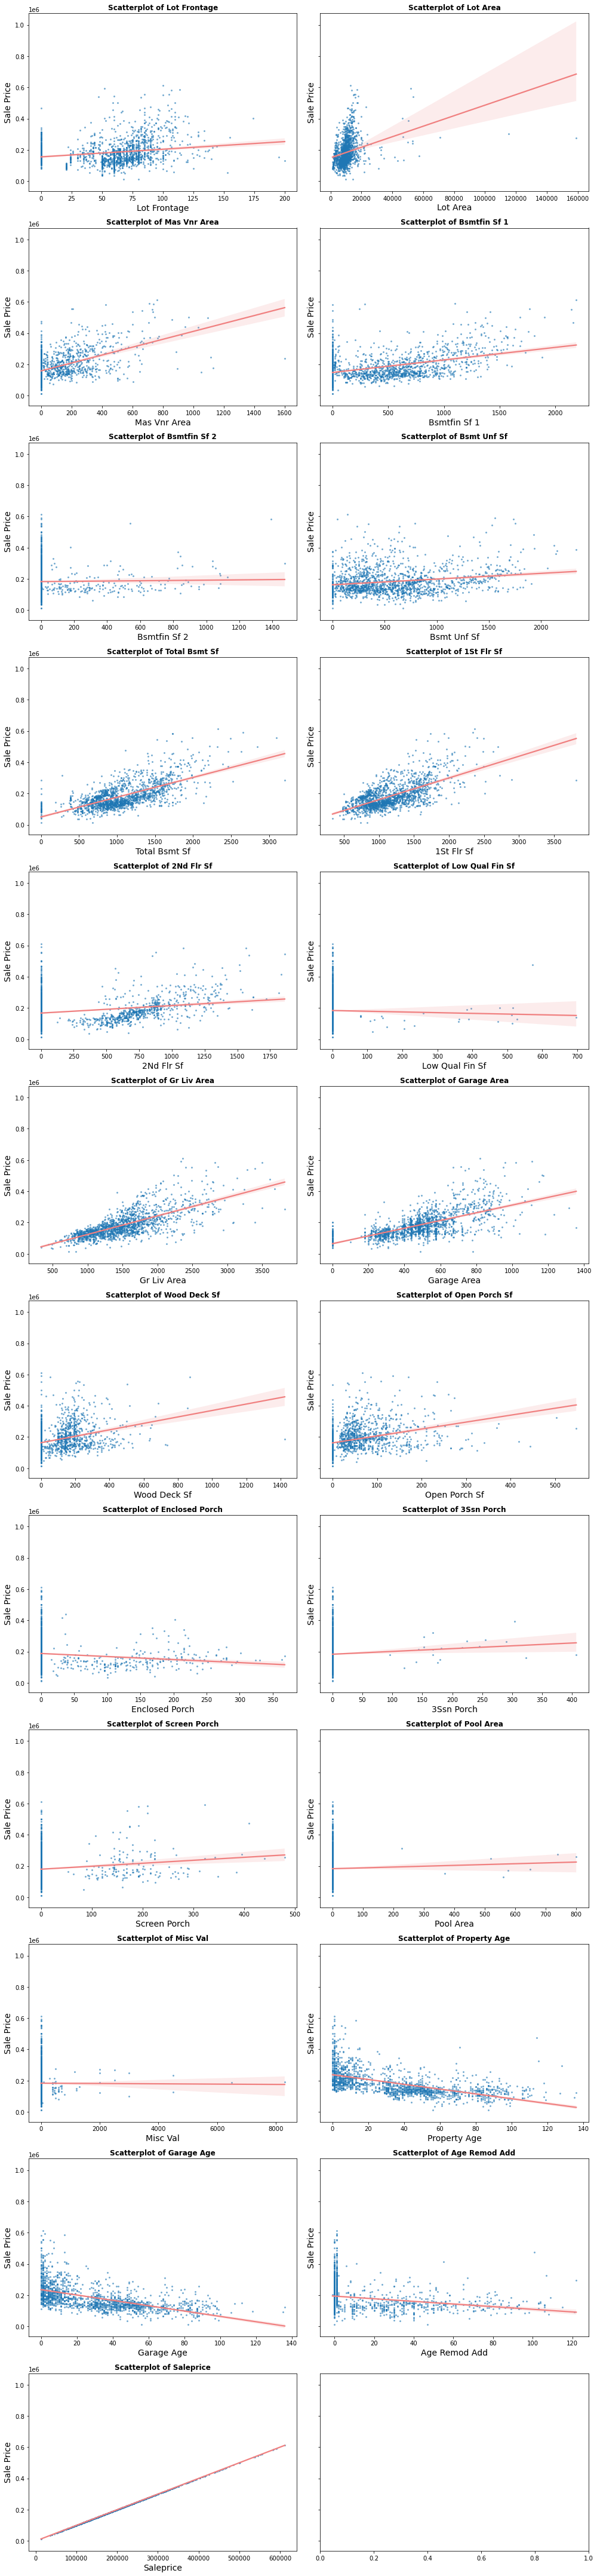

In [140]:
subplot_scatter(train, feature_cat['continuous_feat'])

For continuous features, features that have extremely high percentage of values plotted at 0 would not contribute much to the model. Therefore, they will be dropped.

Continuous features dropped:
1) `'misc_val'`
2) `'pool_area'`
3) `'3ssn_porch'`
4) `'low_qual_fin_sf'`

In [141]:
dropped_continuous_feat = ['misc_val','pool_area','3ssn_porch','low_qual_fin_sf']

drop_feature(train,'continuous_feat',dropped_continuous_feat)

### Discrete Check

Text(0.5, 1.0, 'Correlation Between Discrete Features and Salesprice')

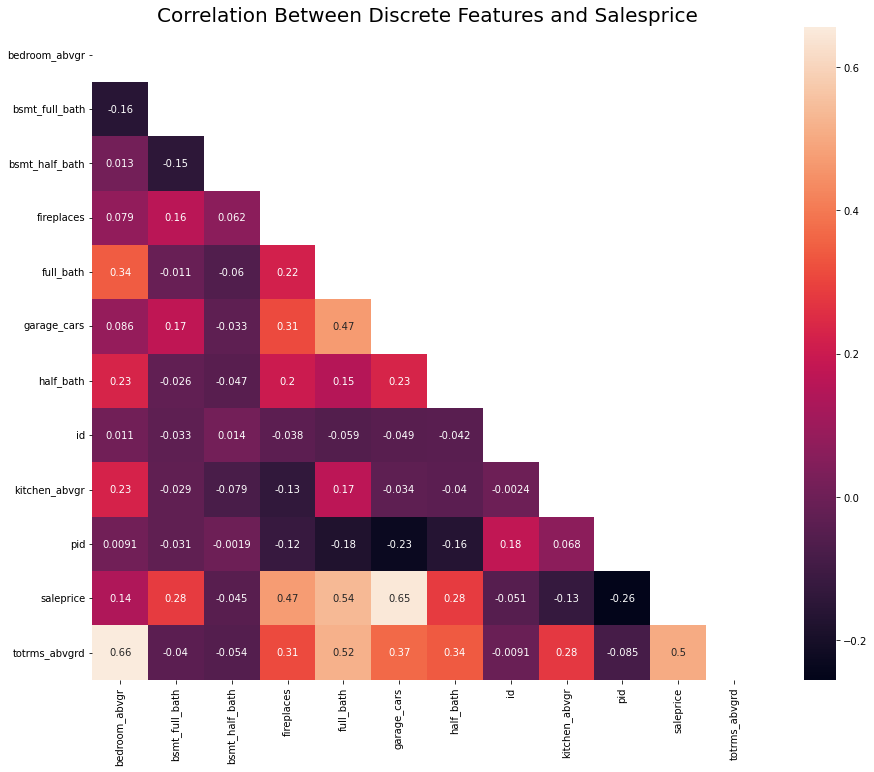

In [142]:
corr_discrete = train[feature_cat.get('discrete_feat')].corrwith(train[['saleprice']])

matrix = np.triu(corr_discrete)

plt.figure(figsize = (15,12))
sns.heatmap(train_df[corr_discrete.index].corr(), annot=True, mask=matrix)
plt.title('Correlation Between Discrete Features and Salesprice', fontsize=20)

For discrete features, features that have less than 0.20 correlation with `'saleprice'` will be dropped. There are also features that cannot be used as they act as identifiers, namely '`id'` and `'pid'` that will be dropped. 
Basement features will not be dropped yet to check if combining some will help the model.

Discrete features dropped:
1) `'id'`
2) `'pid'`
3) `'kitchen_abvgr'`
4) `'bedroom_abvgr'`


In [143]:
#dropping discrete features
dropped_discrete_feat = ['id','pid','kitchen_abvgr','bedroom_abvgr']

drop_feature(train,'discrete_feat',dropped_discrete_feat)

### Additional Feature Selection

<AxesSubplot:>

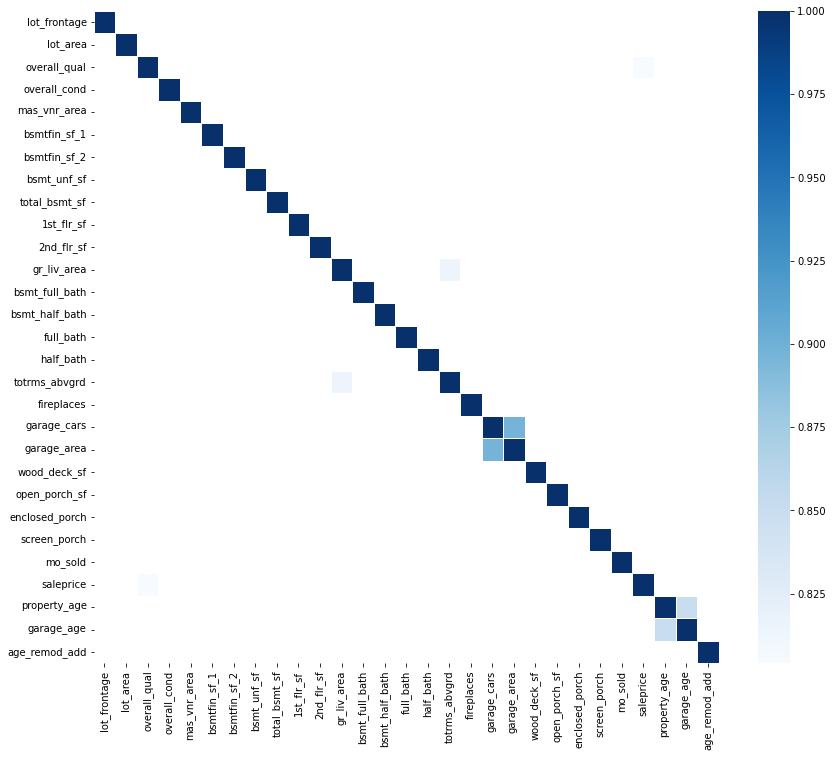

In [144]:
plt.figure(figsize=(14,12))
correlation = train.select_dtypes(exclude=['object']).corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

From the above correlation matrix, we have pinpointed certain features that are highly correlated:

- `'fireplaces'` and `'fireplace_qual'`
- `'garage_area'` and `'garage_cars'`
- `'garage_age'` and `'property_age'`

Therefore, to avoid multi-collinearity, one of the features in the pairs will be dropped based on discretion. Since `'garage_age'` was created from the same feature in creation of `'property_age'`, there is bound to have collinearity. Furthermore, about 75% of the garages were built in the same year as the year the property was built.

Features to drop:
1) `'fireplaces'`
2) `'garage_cars'`
3) `'garage_age'`

In [145]:
#dropping additional features
dropped_add_feat = ['fireplaces','garage_cars','garage_age']

##updating dictionary
for item in feature_cat.values():
    for feature in dropped_add_feat:
        if feature in item:
            item.remove(feature)

##dropping from train dataframe
train.drop(columns=dropped_add_feat, inplace=True)

### Feature Engineering

In [146]:
col_list = train.columns.values.tolist()

area_list = making_list(col_list, 'area')
sf_list = making_list(col_list, '_sf')

Text(0.5, 1.0, 'Correlation Between Size-Related Features')

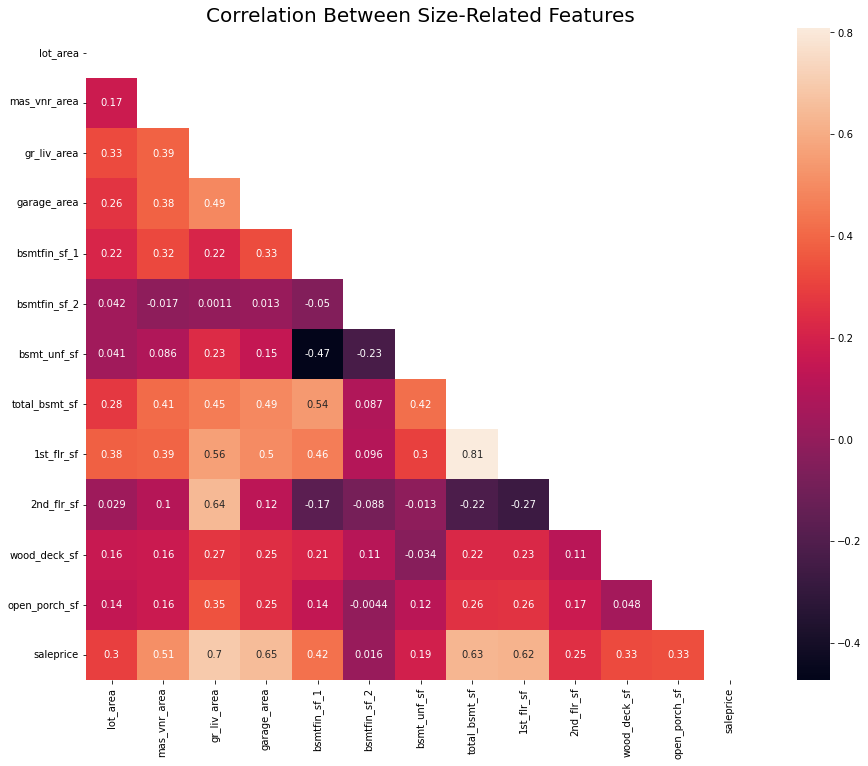

In [147]:
corr_feats = train[area_list + sf_list + ['saleprice']].corr()

matrix = np.triu(corr_feats)

plt.figure(figsize = (15,12))
sns.heatmap(train_df[corr_feats.index].corr(), annot=True, mask=matrix)
plt.title('Correlation Between Size-Related Features', fontsize=20)

In [148]:
# Creating interaction features for feature pairs with absolute correlation value > 0.5
train['1st_flr_sf_total_bsmt_sf'] = train['1st_flr_sf'] * train['total_bsmt_sf']
train['bsmtfin_sf_1_total_bsmt_sf'] = train['bsmtfin_sf_1'] * train['total_bsmt_sf']
train['gr_liv_area_2nd_flr_sf'] = train['gr_liv_area'] * train['2nd_flr_sf']
train['gr_liv_area_1st_flr_sf'] = train['gr_liv_area'] * train['1st_flr_sf']

Based on the heamap, not many of the features related to size were highly correlated to each other. Even for the features with extremely high correlation values such as `'1st_flr_sf'` and `'total_bsmt_sf'`, we will not be dropping them as they are deemed too important (judging from their high correlation value with '`saleprice'`).

However, we can still create interaction features for the feature pairs with significant correlation values, to see if these new features have a bigger effect on the model later on. As such new features were created from the above combination.

In [149]:
#updating dictionary
new_cont_feat = ['1st_flr_sf_total_bsmt_sf', 'bsmtfin_sf_1_total_bsmt_sf', 'gr_liv_area_2nd_flr_sf', 'gr_liv_area_1st_flr_sf']

feature_cat.get('continuous_feat').extend(new_cont_feat)

### Outliers

In [150]:
#checking outliers
train[['gr_liv_area']].sort_values(by=['gr_liv_area'],ascending=False)

,gr_liv_area
35,3820
1597,3672
386,3608
1016,3500
853,3493
...,...
58,498
690,492
191,480
1388,438


In [151]:
train[['total_bsmt_sf']].sort_values(by=['total_bsmt_sf'],ascending=False)

,total_bsmt_sf
1631,3206.0
108,3094.0
254,2846.0
1422,2660.0
931,2633.0
...,...
1313,0.0
1301,0.0
1049,0.0
1052,0.0


In [152]:
train[['1st_flr_sf']].sort_values(by=['1st_flr_sf'],ascending=False)

,1st_flr_sf
35,3820
1188,2898
224,2726
254,2696
931,2633
...,...
191,480
33,453
953,448
1388,438


In [153]:
#filtering out the outliers
train = train.loc[train['gr_liv_area'] < 4500]
train = train.loc[train['total_bsmt_sf'] < 6000]
train = train.loc[train['1st_flr_sf'] < 4000]

In [154]:
train.reset_index(drop=True, inplace=True)

In [155]:
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_type,garage_finish,garage_area,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,sale_type,saleprice,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf
0,70,RM,0.0,5700,IR1,Lvl,Corner,OldTown,1Fam,2Story,7,6,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,336.0,Unf,0.0,336.0,672.0,Gd,N,FuseA,672,672,1344,1.0,0.0,1,1,Gd,6,Gd,Attchd,Unf,456.0,TA,0,0,70,0,9,WD,140000,78,61,451584.0,225792.0,903168,903168
1,120,RL,48.0,6955,IR1,Lvl,Inside,NridgHt,TwnhsE,1Story,7,5,Gable,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,Ex,Y,SBrkr,1368,0,1368,0.0,0.0,2,0,Gd,6,Gd,Attchd,RFn,474.0,TA,132,35,0,0,9,New,202500,1,1,1871424.0,0.0,0,1871424
2,20,RL,71.0,8197,Reg,Lvl,Inside,Sawyer,1Fam,1Story,6,5,Gable,Plywood,Plywood,BrkFace,148.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,660.0,660.0,Ex,Y,SBrkr,1285,0,1285,0.0,0.0,1,1,TA,7,TA,Attchd,RFn,528.0,TA,138,0,0,0,4,WD,143500,30,0,848100.0,0.0,0,1651225
3,60,RL,83.0,10005,Reg,Lvl,Inside,ClearCr,1Fam,2Story,7,5,Hip,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392.0,Unf,0.0,768.0,1160.0,Ex,Y,SBrkr,1156,866,2022,0.0,0.0,2,1,TA,8,TA,Attchd,Fin,505.0,TA,288,117,0,0,3,WD,192000,31,0,1340960.0,454720.0,1751052,2337432
4,190,RL,75.0,10382,Reg,Lvl,Inside,NAmes,2fmCon,SLvl,6,5,Hip,HdBoard,HdBoard,BrkFace,105.0,TA,Fa,CBlock,TA,TA,Gd,ALQ,513.0,Unf,0.0,75.0,588.0,TA,Y,SBrkr,1095,0,1095,1.0,0.0,1,0,TA,6,NA,Attchd,RFn,264.0,TA,0,0,0,0,3,ConLD,140000,48,0,643860.0,301644.0,0,1199025


------------------------------------------------
## Preprocessing

### Ordinal Encoding

In [156]:
ordinal_cols_mapping = [{
    'col':'lot_shape',
    'mapping': {
        'IR3': 0,
        'IR2': 1,
        'IR1': 2,
        'Reg': 3
    }}, {   
     'col': 'exter_qual',
    'mapping': {
        'Ex': 4,
        'Gd':3, 
        'TA':2,
        'Fa':1,
        'Po':0,
    }}, {
    'col': 'exter_cond',
    'mapping': {
        'Ex': 4,
        'Gd':3, 
        'TA':2,
        'Fa':1,
        'Po':0,
    }}, {      
        'col': 'bsmt_qual',
    "mapping": {
        'Ex': 4,
        'Gd':3, 
        'TA':2,
        'Fa':1,
        'Po':0,
        'NA':-1,
    }}, {
    'col': 'bsmt_cond',
    'mapping': {
        'Ex': 4,
        'Gd':3, 
        'TA':2,
        'Fa':1,
        'Po':0,
        'NA':-1,
    }}, {
    'col':'bsmt_exposure',
    'mapping': {
        'NA': -1,
        'No': 0,
        'Mn': 1,
        'Av': 2,
        'Gd': 3,
    }}, {
    'col':'bsmtfin_type_1',
    'mapping': {
        'NA': -1,
        'Unf': 0,
        'LwQ': 1,
        'Rec': 2,
        'BLQ': 3,
        'ALQ': 4,
        'GLQ': 5
    }}, {
    'col':'bsmtfin_type_2',
    'mapping': {
        'NA': -1,
        'Unf': 0,
        'LwQ': 1,
        'Rec': 2,
        'BLQ': 3,
        'ALQ': 4,
        'GLQ': 5,
    }}, {
    'col': 'heating_qc',
    'mapping': {
        'NA': -1,
        'Po': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3, 
        'Ex': 4,
    }}, {
    'col':'electrical',
    'mapping': {
        'Mix': 0,
        'FuseP': 1,
        'FuseF': 2,
        'FuseA': 3,
        'SBrkr': 4
    }}, {
    'col': 'kitchen_qual',
    'mapping': {
        'Ex': 4,
        'Gd': 3, 
        'TA': 2,
        'Fa': 1,
        'Po': 0,
        'NA': -1,
    }}, {   
    'col': 'fireplace_qu',
    'mapping': {
        'Ex': 4,
        'Gd': 3, 
        'TA': 2,
        'Fa': 1,
        'Po': 0,
        'NA': -1,
    }}, {
    'col':'garage_finish',
    'mapping': {
        'Fin': 2,
        'RFn': 1,
        'Unf': 0,
        'NA': -1,
    }}, {
    'col': 'garage_cond',
    'mapping': {
        'Ex': 4,
        'Gd': 3, 
        'TA': 2,
        'Fa': 1,
        'Po': 0,
        'NA': -1,
    }}, {
    'col': 'overall_cond',
    'mapping':{
        1: 0,
        2: 1,
        3: 2,
        4: 3,
        5: 4,
        6: 5,
        7: 6,
        8: 7,
        9: 8,
    }}, {
    'col': 'overall_qual',
    'mapping':{
        1: 0,
        2: 1,
        3: 2,
        4: 3,
        5: 4,
        6: 5,
        7: 6,
        8: 7,
        9: 8,
    }},

]

In [157]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
                             return_df = True)

train_ordinal = train[feature_cat.get('ordinal_feat')]
train_oe = encoder.fit_transform(train_ordinal)

# Join df back to main train dataframe, drop original nominal feature columns
train = train.drop(columns=feature_cat.get('ordinal_feat')).join(train_oe)

After studying the data dictionary, we mapped the ranked values to their respective integer value. We have encoded the respectively values in the ordinal features using `OrdinalEncoder` as it would maintain the importance of the ranks.

### One-Hot Encoding

In [158]:
# Reset index of train set for preprocessing
train.reset_index(drop=True, inplace=True)

In [159]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore') 
# Ignore unknown variables when transforming validation/test set
# Avoid dropping first, might drop cols differently for train/test sets leading to loss of data

# Fit to train set & transform
train_nominal = train[feature_cat.get('nominal_feat')]
train_ohe = ohe.fit_transform(train_nominal)

# Create a df with one hot encoded features
train_ohe_df = pd.DataFrame(train_ohe.toarray(), columns=ohe.get_feature_names_out())

# Join df back to main train dataframe, drop original nominal feature columns
train = train.join(train_ohe_df).drop(columns=feature_cat.get('nominal_feat'))

In [160]:
train.head()

,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totrms_abvgrd,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,saleprice,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,fireplace_qu,garage_finish,garage_cond,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,mo_sold_1,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
0,0.0,5700,0.0,336.0,0.0,336.0,672.0,672,672,1344,1.0,0.0,1,1,6,456.0,0,0,70,0,140000,78,61,451584.0,225792.0,903168,903168,2,6.0,5,2,2,2,2,0,2,0,3,3,3,3,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,48.0,6955,94.0,0.0,0.0,1368.0,136

### Scaling

In [161]:
feature_cat.get('continuous_feat').remove('saleprice')

In [162]:
# Instantiate StandardScaler
ss = StandardScaler()

# Fit to train set & transform
scale_cols = feature_cat.get('continuous_feat') + feature_cat.get('ordinal_feat')
train_scale = train[scale_cols]
train_ss = ss.fit_transform(train_scale)

# Create a df with scaled features
train_ss_df = pd.DataFrame(train_ss, columns=scale_cols)

# Join df back to main train dataframe, drop original feature columns
train = train.drop(columns=scale_cols).join(train_ss_df)

In [163]:
train.reset_index(drop=True, inplace=True)

In [164]:
train.head()

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totrms_abvgrd,saleprice,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,mo_sold_1,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,fireplace_qu,garage_finish,garage_cond
0,1.0,0.0,1,1,6,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.792307,-0.634537,-0.575158,-0.232653,-0.291011,-0.528151,-0.903625,-1.295189,0.787226,-0.323821,-0.118136,-0.733539,-0.729086,0.819204,-0.298847,1.418381,2.092412,-0.9

------------------------------------------------
## Validation and Test Data Cleaning and Preprocessing

In [165]:
test=pd.read_csv('../datasets/test.csv')

In [166]:
print(test.shape)
test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [167]:
#cleaning column names 
test.rename(columns=lambda x: x.lower().replace(' ', '_').replace('/', '_'), inplace= True)

In [168]:
test['yr_sold'].isnull().any()

False

In [169]:
#making function to mirror the imputes of missing data in train data
def impute_missing(df):
     #imputing missing in garage_yr_built              
    df.loc[df['garage_yr_blt'].isnull(), ['garage_yr_blt']] = df.loc[df['garage_yr_blt'].isnull(), 'year_built']
        
    #combining features to create new features
    df['property_age'] = df['yr_sold'] - df['year_built']
    df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']
    df['age_remod_add'] =df['year_remod_add'] - df['year_built']
    
    #changing 'bsmtfin_type_2' and 'bsmt_exposure' to mode
    change_values(df,['bsmtfin_type_2'], 'Unf', 0)

    change_values(df,['bsmt_exposure'], 'No', 0)

    #changing balance basement features to appropriate values
    change_values(df, bsmt_list, 'NA', 0.0)
    
    float_list2 = df.select_dtypes(include=['float64']).isnull().columns.tolist()
    obj_list2 = df.select_dtypes(include=['object']).isnull().columns.tolist()

    df[obj_list2]=df[obj_list2].fillna('NA')
    df[float_list2]=df[float_list2].fillna(value=0)
    

In [170]:
#making function to mirror the imputes of new features in train data
def impute_new_features(df):
    df['1st_flr_sf_total_bsmt_sf'] = df['1st_flr_sf'] * df['total_bsmt_sf']
    df['bsmtfin_sf_1_total_bsmt_sf'] = df['bsmtfin_sf_1'] * df['total_bsmt_sf']
    df['gr_liv_area_2nd_flr_sf'] = df['gr_liv_area'] * df['2nd_flr_sf']
    df['gr_liv_area_1st_flr_sf'] = df['gr_liv_area'] * df['1st_flr_sf']

In [171]:
#cleaning test dataset
impute_missing(test)

impute_new_features(test)

test=test[feature_cat.get('nominal_feat')+feature_cat.get('discrete_feat')+feature_cat.get('ordinal_feat')+feature_cat.get('continuous_feat')]
test.reset_index(drop=True, inplace=True)

In [172]:
test_ordinal = test[feature_cat.get('ordinal_feat')]
test_oe = encoder.fit_transform(test_ordinal)
test = test.drop(columns=feature_cat.get('ordinal_feat')).join(test_oe)

In [173]:
test_nominal = test[feature_cat.get('nominal_feat')]
test_ohe = ohe.fit_transform(test_nominal)
test_ohe_df = pd.DataFrame(test_ohe.toarray(), columns=ohe.get_feature_names_out())
test = test.join(test_ohe_df).drop(columns=feature_cat.get('nominal_feat'))

In [174]:
test.reset_index(drop=True, inplace=True)
scale_cols = feature_cat.get('continuous_feat')+feature_cat.get('ordinal_feat')
scaled = test[scale_cols]
scaled_ss = ss.transform(scaled)
scaled_ss_df = pd.DataFrame(scaled_ss, columns=scale_cols)
test =test.drop(columns=scale_cols).join(scaled_ss_df)
test.reset_index(drop=True, inplace=True)

In [175]:
print(train.shape)
train.head()

(1638, 192)


,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totrms_abvgrd,saleprice,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,mo_sold_1,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,fireplace_qu,garage_finish,garage_cond
0,1.0,0.0,1,1,6,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.792307,-0.634537,-0.575158,-0.232653,-0.291011,-0.528151,-0.903625,-1.295189,0.787226,-0.323821,-0.118136,-0.733539,-0.729086,0.819204,-0.298847,1.418381,2.092412,-0.9

In [176]:
print(test.shape)
test.head()

(878, 189)


,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totrms_abvgrd,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,mo_sold_1,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,fireplace_qu,garage_finish,garage_cond
0,0,0,2,0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345862,-0.145508,-0.575158,-0.994307,-0.291011,1.003645,-0.090800,-0.675786,1.596333,0.859281,-0.192828,-0.733539,0.198181,1.532659,-0.298847,2.016709,1.190495,-0.438619,-0.752736,1.348459,-0.090137,0.723469,-0.013547,2.274417,-0.714214

In [177]:
#cleaning valid dataset
impute_missing(valid)

impute_new_features(valid)

#must add saleprice column as it was dropped earlier on 
valid=valid[feature_cat.get('nominal_feat')+feature_cat.get('discrete_feat')+feature_cat.get('ordinal_feat')+feature_cat.get('continuous_feat')+['saleprice']]
valid.reset_index(drop=True, inplace=True)

In [178]:
valid_ordinal = valid[feature_cat.get('ordinal_feat')]
valid_oe = encoder.fit_transform(valid_ordinal)
valid = valid.drop(columns=feature_cat.get('ordinal_feat')).join(valid_oe)

In [179]:
valid_nominal = valid[feature_cat.get('nominal_feat')]
valid_ohe = ohe.fit_transform(valid_nominal)
valid_ohe_df = pd.DataFrame(valid_ohe.toarray(), columns=ohe.get_feature_names_out())
valid = valid.join(valid_ohe_df).drop(columns=feature_cat.get('nominal_feat'))

In [180]:
valid.reset_index(drop=True, inplace=True)
scale_cols = feature_cat.get('continuous_feat')+feature_cat.get('ordinal_feat')
scaled = valid[scale_cols]
scaled_ss = ss.transform(scaled)
scaled_ss_df = pd.DataFrame(scaled_ss, columns=scale_cols)
valid =valid.drop(columns=scale_cols).join(scaled_ss_df)
valid.reset_index(drop=True, inplace=True)

In [181]:
print(valid.shape)
valid.head()

(411, 179)


,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totrms_abvgrd,saleprice,ms_subclass_20,ms_subclass_30,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,exterior_1st_AsbShng,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_COD,sale_type_CWD,sale_type_ConLD,sale_type_ConLI,sale_type_New,sale_type_Oth,sale_type_WD,mo_sold_1,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,property_age,age_remod_add,1st_flr_sf_total_bsmt_sf,bsmtfin_sf_1_total_bsmt_sf,gr_liv_area_2nd_flr_sf,gr_liv_area_1st_flr_sf,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,fireplace_qu,garage_finish,garage_cond
0,0.0,1.0,1,0,6,165000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190922,0.275040,0.709464,0.039366,-0.291011,-1.280612,-1.408137,-0.347712,-0.775189,-0.953864,0.105938,0.979403,-0.729086,-0.369888,-0.298847,-0.110680,-0.527442,-0.895902,-0.471886,-0.653978,-0.692007,0.723469,-0.666215,-0.505112,-0.714214,-0.234589,0.552173,1.915918,2.209578,0.683344,-0.326773,0.859587,0.282285,-0.799901,-0.976974,0.284168,0.252429
1,1.0,0.0,2,1,7,300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

------------------------------------------------
## Final Check

In [182]:
def check_missing_cols(first_df, second_df):
    missing=[]
    for cols in first_df.columns.values.tolist():
        if cols not in second_df.columns.values.tolist():
            missing.append(cols)

    return missing

In [183]:
#check for missing columns in valid dataset with train dataset
check_missing_cols(train, valid)

['ms_subclass_150',
 'ms_subclass_40',
 'ms_zoning_A (agr)',
 'ms_zoning_I (all)',
 'neighborhood_GrnHill',
 'roof_style_Shed',
 'exterior_1st_AsphShn',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_AsphShn',
 'foundation_Wood',
 'sale_type_Con',
 'sale_type_ConLw']

In [184]:
#check for missing columns in test dataset with train dataset
check_missing_cols(train, test)

['saleprice',
 'ms_subclass_150',
 'ms_zoning_A (agr)',
 'neighborhood_GrnHill',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone']

Before we can train and test our models with these datasets, we have to make sure the number of columns are the same. Due to different values in the columns, some values may not appear in the test/valid dataset that may appear in the training set. Thus, when we do the necessary encoding, some of the values will not be reflected and leading to the uneven number of columns.
For the train and valid dataset, we can impute the missing columns with all values being 0 in the column.
Same for the test set, but we remove then `'saleprice'` column.

In [185]:
final_valid = valid.reindex(columns = train.columns, fill_value=0)

In [186]:
final_test= test.reindex(columns = train.columns, fill_value=0)

In [187]:
final_test.drop(columns='saleprice', inplace=True)

In [188]:
#final check
print(f'Number of columns in train is {len(train.columns.values.tolist())}')
print(f'Number of columns in valid is {len(final_valid.columns.values.tolist())}')
print(f'Number of columns in test is {len(final_test.columns.values.tolist())}')

Number of columns in train is 192
Number of columns in valid is 192
Number of columns in test is 191


Finally, we have the same number of columns after cleaning and pre-processing the various dataset. Take note that train and valid dataset has the column `'saleprice'`, which will be dropped before the modelling stage.

------------------------------------------------
## Data Export

In [95]:
# Exporting cleaned datasets to .csv files
train.to_csv('../datasets/training_model.csv', index=False)
final_valid.to_csv('../datasets/validation_model.csv', index=False)
final_test.to_csv('../datasets/test_kaggle.csv', index=False)